In [10]:
#Classification Problem
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
df = pd.read_csv('diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [15]:
#we have to normalize our data as it is a binary classification problem
cols_normalize = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

In [16]:
#We can use this function to normalize our data from a real-life datasets
df[cols_normalize] = df[cols_normalize].apply(lambda x : (x - x.min())/(x.max() - x.min()))

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


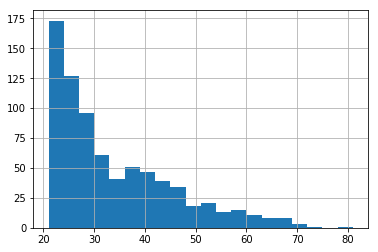

In [22]:
#we will turn the age column from continous numeric to 
#categorical with a unique group for each decade.
#This will help us better understand the data 
#=> feature enginnering
df['Age'].hist(bins=20)

In [20]:
#Inizializing Features
#Numerical Values
preg_num = tf.feature_column.numeric_column('Pregnancies')
glucose =  tf.feature_column.numeric_column('Glucose')
bp = tf.feature_column.numeric_column('BloodPressure')
Skin_thck = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
db_pedigree = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')

In [23]:
age_bucket = tf.feature_column.bucketized_column(age,
                                                 boundaries=[20,30,40,50,60,70,80])

In [ ]:
#Categorical Values
#If there is a categorical column for diabetes type, this is how you will deal with it
#diabettes_grp = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [24]:
feat_columns = [preg_num,glucose,bp,Skin_thck,insulin,bmi,db_pedigree,age_bucket]

In [25]:
#Split our data for train test
X = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

Lets create our functions for training and testing

In [35]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                 y=y_train,
                                                batch_size=10,
                                                num_epochs=1000,
                                                shuffle=True)

In [36]:
model = tf.estimator.LinearClassifier(feature_columns=feat_columns,
                                     n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Muneeb\\AppData\\Local\\Temp\\tmpdk5qzmym', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001DEB922BB08>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [37]:
model.train(input_fn=input_func,steps = 1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Muneeb\AppData\Local\Temp\tmpdk5qzmym\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 208.741
INFO:tensorflow:loss = 6.4836245, step = 101 (0.479 sec)
INFO:tensorflow:global_step/sec: 449.226
INFO:tensorflow:loss = 4.361206, step = 201 (0.223 sec)
INFO

In [38]:
#To evaluate our model, we will use another function
#with the test data as inputs and will only run through
#1 epoch without shuffling
eval_input_fnc = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                    y=y_test,
                                                    batch_size=10,
                                                    num_epochs=1,
                                                    shuffle=False)

In [39]:
results = model.evaluate(eval_input_fnc)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-28T17:18:31Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\Muneeb\AppData\Local\Temp\tmpdk5qzmym\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-09-28-17:18:33
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.8025926, auc_precision_recall = 0.6534736, average_loss = 0.52372706, global_step = 1000, label/mean = 0.35064936, loss = 5.040873, precision = 0.6567164, prediction/mean = 0.36260608, recall = 0.54320985
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Muneeb\AppData\Local

In [41]:
#The metrics for our model are as follows:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8025926,
 'auc_precision_recall': 0.6534736,
 'average_loss': 0.52372706,
 'label/mean': 0.35064936,
 'loss': 5.040873,
 'precision': 0.6567164,
 'prediction/mean': 0.36260608,
 'recall': 0.54320985,
 'global_step': 1000}

In [42]:
#Lets get some predictions
#As we do not have some new data, we will use the x_test as
#our input
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                     batch_size=10,
                                                     num_epochs=1,
                                                     shuffle=False)

In [43]:
Predictions = model.predict(pred_input_func)

In [44]:
conv_predictions = list(Predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Muneeb\AppData\Local\Temp\tmpdk5qzmym\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [73]:
predict_class_id = []

In [74]:
for i in conv_predictions:
    for j in i['class_ids']:
        predict_class_id.append(j)

{'logits': array([-0.0261544], dtype=float32),
  'logistic': array([0.4934618], dtype=float32),
  'probabilities': array([0.5065382 , 0.49346176], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)}
  
<h5>The above data is the first prediction made by the model.
    The probabilites are of either class 0 or class 1  respectively. As you can see, only by a small percentage, the model predicted that the data is a class 0 

In [67]:
import seaborn as sns

C:\Users\Muneeb\Anaconda3\envs\nlp_course\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Muneeb\Anaconda3\envs\nlp_course\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


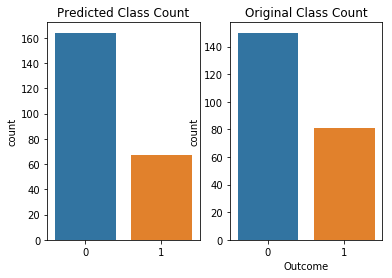

In [88]:
#Just a simple plot to show the count of classes for the original and predicted data
plt.subplot(1,2,1)
plt.title('Predicted Class Count')
sns.countplot(predict_class_id)

plt.subplot(1,2,2)
plt.title('Original Class Count')
sns.countplot(y_test)

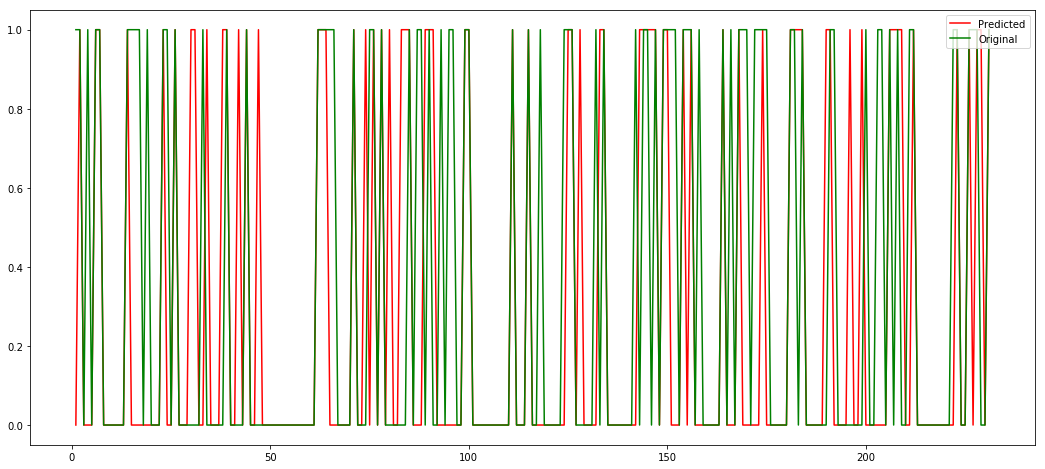

In [96]:
#range 232 set due to the size of the test data
plt.figure(figsize=(18,8))
plt.plot(range(1,232,1),predict_class_id,'r',label='Predicted')
plt.plot(range(1,232,1),y_test,'g',label='Original')
plt.legend(loc='upper right')

The above figure shows the predicted classes and the original test data classes. The points where the lines are overlapping are the points which the model has predicted properly and the others are falsely prediction

In [182]:
#Lets show the number if true positives, false positives and ....
label_matrix = []
original_test_data = []
for i in y_test:
    original_test_data.append(i)

In [183]:
#range 0-230 set due to the size of test and pred data
#positve = 1 , negative = 0
def label_mat(original_dat,predictions_dat,output):
    for i in range(0,230):
        if(original_dat[i] == 1 and predictions_dat[i] == 1):
            output.append('True Positive')
        elif(original_dat[i] == 1 and predictions_dat[i] == 0):
            output.append('False Negative')
        elif(original_dat[i] == 0 and predictions_dat[i] == 1):
            output.append('False Positive')
        elif(original_dat[i] == 0 and predictions_dat[i] == 0):
            output.append('True Negative')

In [184]:
label_mat(original_test_data,predict_class_id,label_matrix)

C:\Users\Muneeb\Anaconda3\envs\nlp_course\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


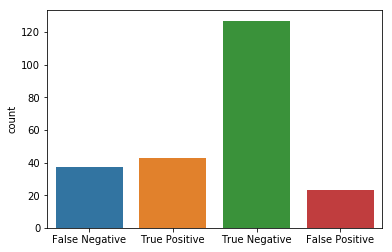

In [185]:
sns.countplot(label_matrix)


<h5>Lets create a dense neural network classifier for the same problem

In [140]:
#hidden units -> the number of neurons per layer
dense_nn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],
                                            feature_columns=feat_columns,
                                           n_classes=2)
# 10 neurons per layer and 3 layers fully connected

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Muneeb\\AppData\\Local\\Temp\\tmpo4cznf7q', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001DEBAC235C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [142]:
#embedded_feature_col = tf.feature_column.embedding_column()
#if you have a categorical column, mention the name of the
#tf variable of the column and the dimension => the number 
#of unique values in it

In [141]:
dense_nn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Muneeb\AppData\Local\Temp\tmpo4cznf7q\model.ckpt.
INFO:tensorflow:loss = 7.0512934, step = 1
INFO:tensorflow:global_step/sec: 163.952
INFO:tensorflow:loss = 6.011694, step = 101 (0.613 sec)
INFO:tensorflow:global_step/sec: 399.661
INFO:tensorflow:loss = 7.9380407, step = 201 (0.267 sec)
INFO:tensorflow:global_step/sec: 384.527
INFO:tensorflow:loss = 4.340481, step = 301 (0.240 sec)
INFO:tensorflow:global_step/sec: 416.586
INFO:tensorflow:loss = 6.8436346, step = 401 (0.250 sec)
INFO:tensorflow:global_step/sec: 400.292
INFO:tensorflow:loss = 6.3650656, step = 501 (0.250 sec)
INFO:tensorflow:global_step/sec: 384.543
INFO:tensorflow:loss = 5.7643995, step = 601 (0.260 sec)
INFO:tensorflow:global_step/s

In [144]:
#eval_input_fnc = tf.estimator.inputs.pandas_input_fn(x=X_test,
#                                                    y=y_test,
#                                                    batch_size=10,
#                                                    num_epochs=1)
DNN_eval = dense_nn_model.evaluate(eval_input_fnc)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-28T19:33:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Muneeb\AppData\Local\Temp\tmpo4cznf7q\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-09-28-19:33:49
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.76623374, accuracy_baseline = 0.64935064, auc = 0.8449794, auc_precision_recall = 0.73146784, average_loss = 0.46464324, global_step = 1000, label/mean = 0.35064936, loss = 4.4721913, precision = 0.6626506, prediction/mean = 0.3783271, recall = 0.67901236
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Muneeb\AppData\Local\Temp\tmpo4cznf7q\model.ckpt-1000


In [146]:
DNN_eval

{'accuracy': 0.76623374,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8449794,
 'auc_precision_recall': 0.73146784,
 'average_loss': 0.46464324,
 'label/mean': 0.35064936,
 'loss': 4.4721913,
 'precision': 0.6626506,
 'prediction/mean': 0.3783271,
 'recall': 0.67901236,
 'global_step': 1000}

<h5>The metric evaluation of this DNN is rather similar to the Linear Classifier. You can play around with the design of the NN by changing the number of layers and neurons.

In [147]:
Predictions_dnn = dense_nn_model.predict(pred_input_func)

In [148]:
conv_predictions_dnn = list(Predictions_dnn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Muneeb\AppData\Local\Temp\tmpo4cznf7q\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [149]:
predict_class_id_dnn = []
for i in conv_predictions_dnn:
    for j in i['class_ids']:
        predict_class_id_dnn.append(j)

In [177]:
label_matrix_dnn = []

In [180]:
label_mat(original_test_data,predict_class_id_dnn,label_matrix_dnn)

C:\Users\Muneeb\Anaconda3\envs\nlp_course\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


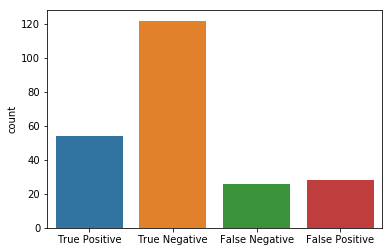

In [181]:
sns.countplot(label_matrix_dnn)

<h5>This notebook basically goes through the process of training a linear classifier and a dense neural network classifier to predict if the person has diabetes or not according to certain variables and data. With both models having a rather similar evaluation metrics, we can choose either model. You can play around with the model features to get different results.